In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Data = np.loadtxt('../source/sms.txt', dtype = int, skiprows = 1)
N, dp1 = Data.shape
d = dp1 - 1
print(N, d)

5574 560


In [3]:
print(np.count_nonzero(Data[:, -1] == 0))
print(np.count_nonzero(Data[:, -1] == 1))

4827
747


In [4]:
X = Data[:, 0:d]
y = Data[:, -1]

In [5]:
X.shape

(5574, 560)

In [6]:
y.shape

(5574,)

In [7]:
X.dtype

dtype('int32')

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [9]:
from sklearn.naive_bayes import BernoulliNB
nb_model = BernoulliNB()
nb_model.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [10]:
#from sklearn.naive_bayes import MultinomialNB
#nb_model = MultinomialNB()
#nb_model.fit(X_train, y_train)

In [11]:
#from sklearn.naive_bayes import GaussianNB
#nb_model = GaussianNB()
#nb_model.fit(X_train, y_train)

In [12]:
y_train_pred = nb_model.predict(X_train)
y_test_pred = nb_model.predict(X_test)

print(np.mean(y_train_pred != y_train))
print(np.mean(y_test_pred != y_test))

0.0188995215311
0.0229555236729


In [13]:
from sklearn.metrics import confusion_matrix
CF = confusion_matrix(y_train_pred, y_train)
print(CF)

[[3613   68]
 [  11  488]]


In [14]:
from sklearn.metrics import confusion_matrix
CF = confusion_matrix(y_test_pred, y_test)
print(CF)

[[1197   26]
 [   6  165]]


$
\begin{array}{|c|c|}
\hline
{\rm TN} & {\rm FN} \\
\hline
{\rm FP} & {\rm TP} \\
\hline
\end{array}
$

${\rm TN}$ – true negative
${\rm FP}$ – false positive
${\rm FN}$ – false negative
${\rm TP}$ – true positive


${\rm FP}$ – _ложные тревоги_ (ошибки 1-го рода или $\alpha$-ошибки)

${\rm FN}$ – _промахи_ (ошибки 2-го рода или $\beta$-ошибки)

$\alpha = {\rm FPR} = \frac{{\rm FP}}{{\rm TN}+{\rm FP}}$ – вероятность ошибки первого рода (_уровень значимости_)

$\beta = {\rm FNR} = \frac{{\rm FN}}{{\rm FN}+{\rm TP}}$ – вероятность ошибки второго рода

${\rm TNR} = \frac{{\rm TN}}{{\rm TN}+{\rm FP}} = 1 - {\rm FPR}$ – _специфичность_ (вероятность предсказать болезнь, при условии, что она есть)

${\rm TPR} = {\rm recall} = \frac{{\rm TP}}{{\rm FN}+{\rm TP}} = 1 - {\rm FNR}$ – _чувствительность_ (вероятность предсказать отсутствие болезни, при условии, что ее нет)


Еще:

${\rm error} = \frac{{\rm FP} + {\rm FN}}{{\rm TP} + {\rm TN} + {\rm FP} + {\rm FN}}$ 

${\rm accuracy} = \frac{{\rm TP} + {\rm TN}}{{\rm TP} + {\rm TN} + {\rm FP} + {\rm FN}} = 1 - {\rm error}$ 

${\rm precision} = \frac{{\rm TP}}{{\rm FP}+{\rm TP}}$ 

$F_1 = 2\cdot\frac{{\rm precision}\cdot{\rm recall}}{{\rm precision}+{\rm recall}}$ 





In [15]:
fpr = float(CF[1, 0])/(CF[0, 0] + CF[1, 0])
fnr = float(CF[0, 1])/(CF[0, 1] + CF[1, 1])
print(fpr, fnr)

0.00498753117207 0.13612565445


In [16]:
tnr = 1 - fpr
tpr = 1 - fnr
print(tnr, tpr)

0.995012468828 0.86387434555


## ROC-кривая

In [17]:
from sklearn.metrics import roc_curve
proba = nb_model.predict_proba(X_test)[:, 1]

In [18]:
proba.shape

(1394,)

In [19]:
np.sum(nb_model.predict_proba(X_test), axis =1)

array([ 1.,  1.,  1., ...,  1.,  1.,  1.])

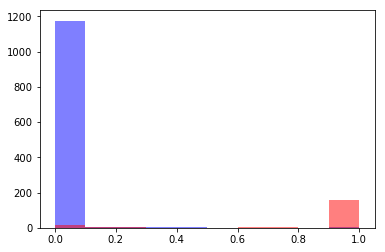

In [20]:
plt.hist(proba[y_test == 0], color = 'b', alpha = 0.5, normed = False)
plt.hist(proba[y_test == 1], color = 'r', alpha = 0.5, normed = False)
pass

In [21]:
fpr, tpr, thresholds = roc_curve(y_test, proba)

In [22]:
print(fpr.shape, tpr.shape, thresholds.shape)

(142,) (142,) (142,)


[-0.05, 1.05, -0.05, 1.05]

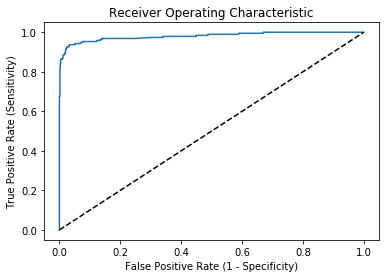

In [23]:
plt.title('Receiver Operating Characteristic')
plt.plot(np.concatenate(([0], fpr)), np.concatenate(([0], tpr)))
#plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.05, 1.05, -0.05, 1.05])

In [24]:
fpr_max = 0.005 # Зададим порог для fpr. Определим, чему должен быть равен tpr (fnr)
for i in range(len(thresholds) - 1):
    if fpr[i] <= fpr_max and fpr[i + 1] > fpr_max:
        print(thresholds[i], fpr[i], 1-tpr[i])

0.604129707618 0.00415627597672 0.13612565445


In [25]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.98035234775191171

|           | AUC                 |
|-----------|---------------------|
|Bernoulli  | 0.98035234775191171 |
|Multinomial| 0.97185700669791486 |
|Gaussian   | 0.77311738106740124 |
